<a href="https://colab.research.google.com/github/DanielSzarek/175IC-machine-learning/blob/main/zad%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from scipy.stats import entropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

# Entropy
print(entropy([0.5,0.8], base=2))
print(entropy([0.8,0.2], base=2))
print(entropy([0.95,0.05], base=2))

0.961236604722876
0.7219280948873623
0.2863969571159562


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# basic description of iris dataset 
sns.set()
np.random.seed(42)

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f"Liczba próbek: {len(data)}")
print(f"Kształt danych: {data.shape}")
print(f"Nazwy zmiennych objaśniających: {feature_names}")
print(f"Nazwy kategorii kosaćca: {target_names}")

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(data=np.c_[data,target], columns=feature_names+['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


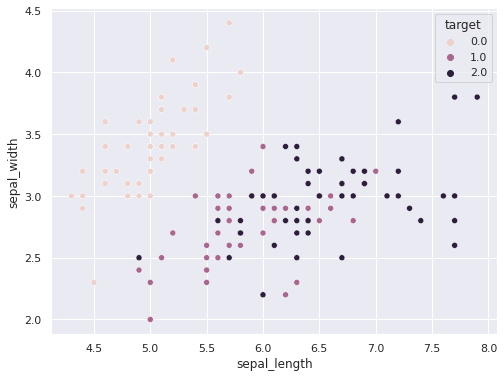

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


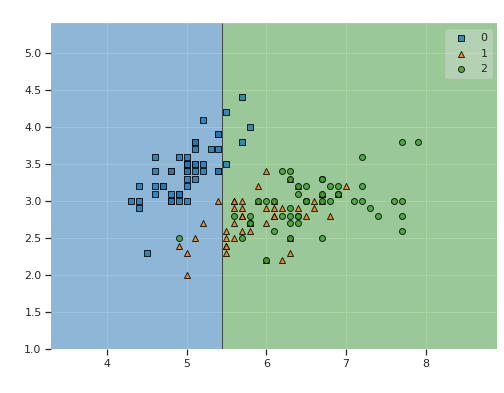

In [16]:
# Decision tree with sklearn
data = df.copy()
data = data[['sepal_length','sepal_width','target']]
target = data.pop('target')

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(data,target)

acc = classifier.score(data, target)
plt.figure(figsize=(8, 6))
plot_decision_regions(data.to_numpy(), target.to_numpy().astype(np.integer), classifier)

plt.xlabel('sepal length (cm)', color='White')
plt.ylabel('sepal width (cm)', color='White')
plt.title(f"Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%", color='White')
plt.show()

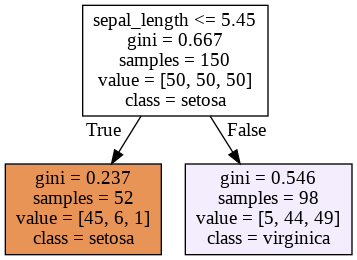

In [20]:
# decision tree graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=300)

Depth: 1
Depth: 2


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Depth: 3


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Depth: 4


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Depth: 5


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Depth: 6


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Depth: 7


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


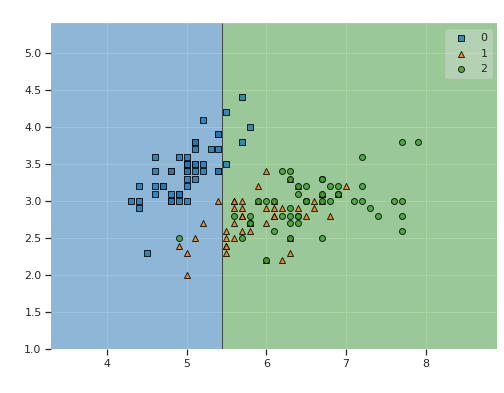

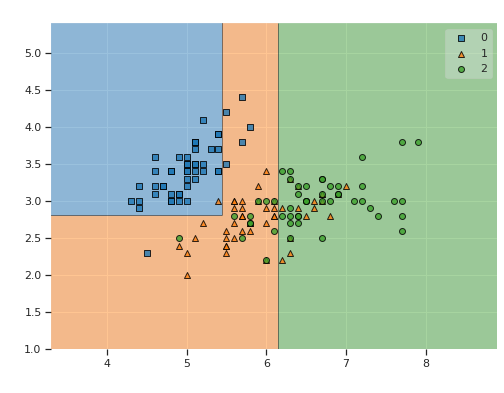

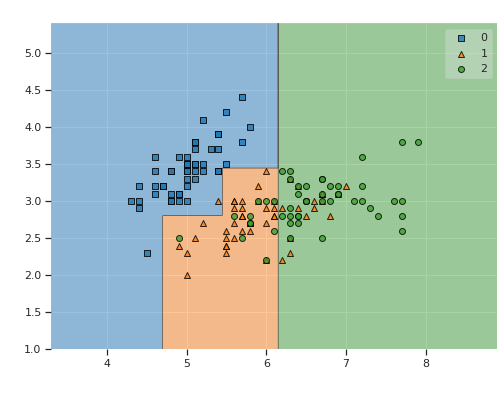

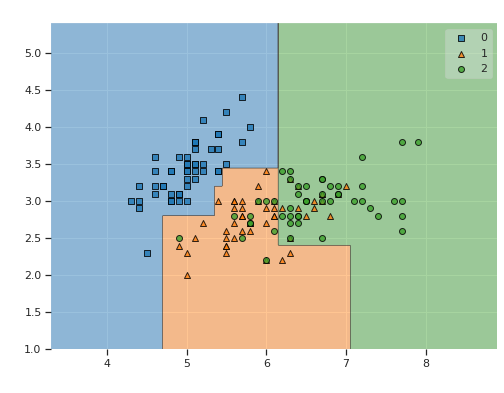

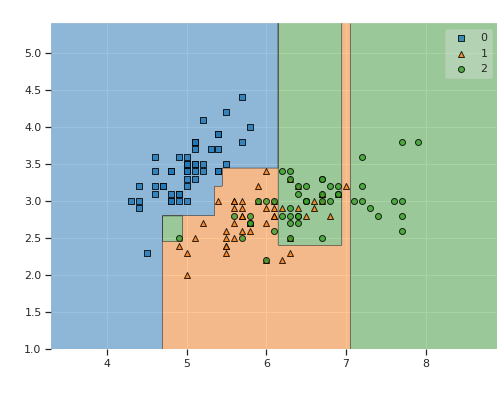

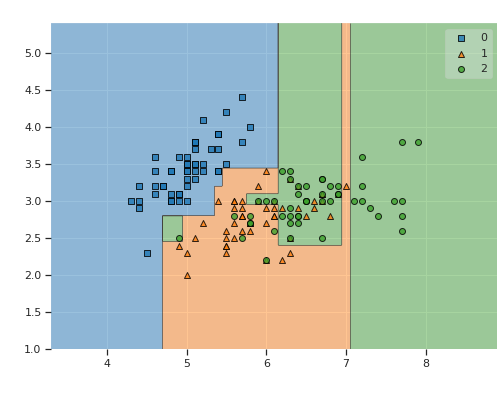

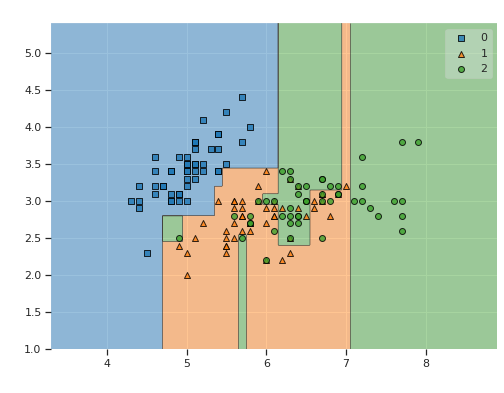

In [30]:
def make_decision_tree(max_depth=1):
  classifier = DecisionTreeClassifier(max_depth=max_depth)
  classifier.fit(data, target)

  dot_data = StringIO()
  export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

  acc = classifier.score(data, target)

  plt.figure(figsize=(8, 6))
  ax = plot_decision_regions(data.to_numpy(), target.to_numpy().astype(np.integer), classifier)
  plt.xlabel('sepal length (cm)', color = 'White')
  plt.ylabel('sepal width (cm)', color='White')
  plt.title(f"Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%", color='White')

  return Image(graph.create_png(), width=200 + max_depth * 120)

for i in range(1, 7):
  print(f"Depth: {i}")
  make_decision_tree(i)

# Odpowiedź: Uważam, że 5-ta głebokość wskazuje na przeuczenie drzewa. 
# Zbiory zaczynają się przecinać. 
# Nauczanie zaczyna skupiać się na pojedynczych przypadkach, które mogą odbiegać od właściwych wartości.